In [ ]:
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier 

In [ ]:
df = pd.read_csv("spam.csv",encoding = "ISO-8859-1")

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
pd.unique(df.v1)

array(['ham', 'spam'], dtype=object)

In [ ]:
d1 = {'spam': 1 , 'ham': 0}
df['v1'] = df['v1'].map(d1)

In [ ]:
labels=np.asarray(df.v1)
texts=np.asarray(df.v2).astype('<U910')
print("number of texts :" , len(texts))
print("number of labels: ", len(labels))

number of texts : 5572
number of labels:  5572


In [ ]:
maxlen = 500
tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
df = pad_sequences(sequences, maxlen=maxlen)
np.random.seed(42)

indices = np.arange(df.shape[0])
np.random.shuffle(indices)
df = df[indices]
clases = labels[indices]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, clases, test_size=0.2, shuffle=True)

In [ ]:
#!pip install tensorflow_decision_forests
import tensorflow_decision_forests as tfdf
model = tfdf.keras.RandomForestModel()
model.fit(X_train, y_train)

Use /tmp/tmpgdc0nra4 as temporary training directory
Reading training dataset...
Training dataset read in 0:00:06.562079. Found 4457 examples.
Training model...
Model trained in 0:00:45.282714
Compiling model...
Model compiled.


In [ ]:
#RF = RandomForestClassifier(max_depth=12, n_estimators=100)
#RF.fit(X_train, y_train)
y_pred_RF= model.predict(X_test)

35/35 [==============================] - 1s 3ms/step


In [ ]:
y_pred_RF[y_pred_RF>=0.5]=1
y_pred_RF[y_pred_RF<0.5]=0

In [ ]:
cm=confusion_matrix(y_test, y_pred_RF)

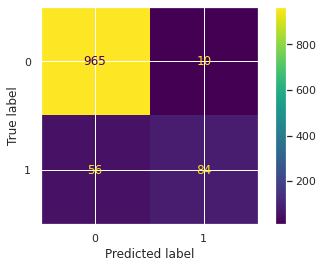

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


In [ ]:
from sklearn import svm, metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_RF))
print("Precision:", metrics.precision_score(y_test, y_pred_RF))
print("Recall:", metrics.recall_score(y_test, y_pred_RF))

Accuracy: 0.9408071748878923
Precision: 0.8936170212765957
Recall: 0.6
